In [58]:
import pandas as pd
import numpy as np

from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import os

In [59]:
#RUNNING IN JUPYTER
os.chdir("C:\\Users\\rarsi\\Rutgers University\\Michelle Chen - COVID_Fatigue\\RC_award\\Data")
#os.chdir("C:\\Users\\katgm\\Rutgers University\\Michelle Chen - Rutgers_Neuropsych_Lab\\COVID_Fatigue\\RC_award\\Data\\Concatenated_Data\\Padasip_Clean_Data")

In [60]:
f_path = "COVID_PHI_E4.xlsx"
df = pd.read_excel(f_path, header=0)
df.head()

,SubjID,record_id,redcap_survey_identifier,screening_questionnaire_timestamp,screen1,screen2,screen3,screen20,screen16,screen18,...,RAVLT_delay,LSWM,OSD,PV,visual_acuity,nih_version,deviations,slope,max_delta,max_abs
0,Cov4,5,NaN,2023-02-13 11:45:41,38,1,1,NaN,NaN,NaN,...,2,15,*,116,*,V2,OSD invalid; timer did not go off. Visual acui...,1.642857,14,86
1,Cov5,7,NaN,2023-02-13 13:20:00,53,1,1,NaN,NaN,NaN,...,7,14,42,108,14,V2,TMT-B did not complete without help,2.500000,58,70
2,Cov7,9,NaN,2023-02-27 09:57:51,40,1,1,NaN,NaN,NaN,...,6,9,80,69,85,V2,NaN,4.821429,58,100
3,Cov8,10,NaN,2023-02-27 10:22:52,51,1,1,NaN,NaN,NaN,...,5,16,60,99,84,V2,NaN,4.928571,25,76
4,Cov13,17,NaN,2023-03-27 10:06:28,56,1,1,NaN,Iphone,NaN,...,6,16,56,108,16,V2,NaN,2.108434,15,100


In [66]:
# Select columns with T scores, raw scores, etc. and exclude categorical/descriptive data
selected_columns = [
    'screen1', 'perla', 'nis', 'fvc_best', 'sp_height', 'sp_weight', 'nn_raw', 'nn_raw_v2', 'nab_sem_raw_v2', 'nab_pho_raw_v2', 'jolo_raw_v2', 'MFIS_cog_subscale', 'MFIS_total', 'PSQI_comp1', 'PSQI_comp2', 'PSQI_comp3',
    'PSQI_comp4', 'PSQI_comp5', 'PSQI_comp6', 'PSQI_comp7', 'PSQI_global', 'COWAT_ani',
    'COWAT_fas', 'depression', 'anxiety', 'PROMIS_fatigue', 'PROMIS_sleep_disturbance',
    'PROMIS_sleep_impairment', 'pain_int', 'RAVLT', 'RAVLT_delay', 'LSWM', 'OSD', 'PV',
    'visual_acuity', 'slope',	'max_delta',	'max_abs'
]

# selected_columns = [
#     'screen1', 'sp_height', 'sp_weight', 'nn_raw', 'nn_raw_v2', 'nab_sem_raw_v2', 'nab_pho_raw_v2', 'jolo_raw_v2', 'MFIS_cog_subscale', 'MFIS_total', 'PSQI_comp1', 'PSQI_comp2', 'PSQI_comp3',
#     'PSQI_comp5', 'PSQI_comp6', 'PSQI_comp7', 'COWAT_ani',
#     'COWAT_fas', 'depression', 'anxiety', 'PROMIS_fatigue', 'PROMIS_sleep_disturbance',
#     'PROMIS_sleep_impairment', 'pain_int', 'RAVLT', 'RAVLT_delay', 'LSWM', 'OSD', 'PV',
#     'visual_acuity', 'slope',	'max_delta',	'max_abs'
# ]
    
df_selected = df[selected_columns]


In [67]:
from sklearn.impute import SimpleImputer

df_selected = df_selected.replace(['*', '???',''], np.nan)
df_selected.head()




C:\Users\rarsi\AppData\Local\Temp\ipykernel_16708\3973892803.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_selected = df_selected.replace(['*', '???',''], np.nan)


,screen1,perla,nis,fvc_best,sp_height,sp_weight,nn_raw,nn_raw_v2,nab_sem_raw_v2,nab_pho_raw_v2,...,pain_int,RAVLT,RAVLT_delay,LSWM,OSD,PV,visual_acuity,slope,max_delta,max_abs
0,38,1.0,2.0,3.44,63.0,140.0,30.0,NaN,NaN,NaN,...,73.7,14,2,15,NaN,116,NaN,1.642857,14,86
1,53,2.0,1.0,3.91,69.0,140.0,31.0,NaN,NaN,NaN,...,66.9,23,7,14,42.0,108,14.0,2.500000,58,70
2,40,4.0,3.0,2.32,62.0,126.0,25.0,NaN,NaN,NaN,...,52.8,17,6,9,80.0,69,85.0,4.821429,58,100
3,51,5.0,4.0,1.97,67.0,330.0,31.0,NaN,NaN,NaN,...,68.2,20,5,16,60.0,99,84.0,4.928571,25,76
4,56,6.0,6.0,2.41,NaN,NaN,31.0,NaN,NaN,NaN,...,38.7,24,6,16,56.0,108,16.0,2.108434,15,100


In [68]:
# Finding columns with missing data
missing_data_columns = df_selected.columns[df_selected.isnull().any()].tolist()

# Print the list of columns with missing data
print("Columns with missing data:", missing_data_columns)


Columns with missing data: ['perla', 'nis', 'sp_height', 'sp_weight', 'nn_raw', 'nn_raw_v2', 'nab_sem_raw_v2', 'nab_pho_raw_v2', 'jolo_raw_v2', 'MFIS_cog_subscale', 'MFIS_total', 'PSQI_comp1', 'PSQI_comp2', 'PSQI_comp3', 'PSQI_comp4', 'PSQI_comp5', 'PSQI_comp6', 'PSQI_comp7', 'PSQI_global', 'depression', 'anxiety', 'PROMIS_sleep_impairment', 'pain_int', 'OSD', 'visual_acuity']


In [69]:
# # Impute missing values using mean or median
# imputer = SimpleImputer(strategy='mean')  # or 'median'
# df_imputed = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# df_imputed.head()

df_selected=df_selected.dropna(axis=1)
df_selected.head()

,screen1,fvc_best,COWAT_ani,COWAT_fas,PROMIS_fatigue,PROMIS_sleep_disturbance,RAVLT,RAVLT_delay,LSWM,PV,slope,max_delta,max_abs
0,38,3.44,20,22,77.7,65.9,14,2,15,116,1.642857,14,86
1,53,3.91,13,29,66.1,59.4,23,7,14,108,2.500000,58,70
2,40,2.32,14,21,62.7,54.7,17,6,9,69,4.821429,58,100
3,51,1.97,19,42,72.0,73.5,20,5,16,99,4.928571,25,76
4,56,2.41,25,50,65.9,55.8,24,6,16,108,2.108434,15,100


In [70]:
from factor_analyzer import FactorAnalyzer

# Select the method based on whether data was dropped or imputed
df_analysis = df_selected  # or df_imputed if you imputed missing values

# Conduct factor analysis
fa = FactorAnalyzer()
fa.fit(df_analysis)


FactorAnalyzer(rotation_kwargs={})

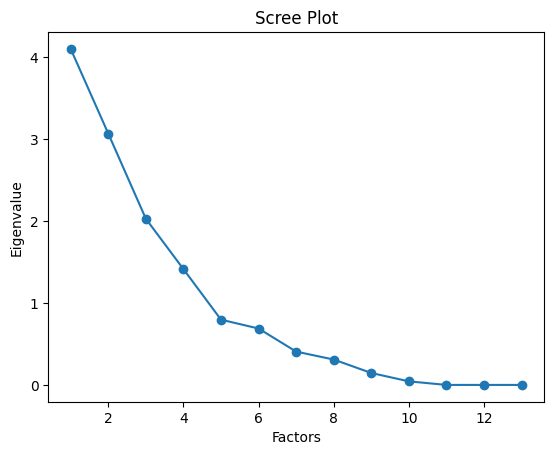

In [71]:
import matplotlib.pyplot as plt

# Evaluate eigenvalues
ev, _ = fa.get_eigenvalues()
plt.scatter(range(1, df_analysis.shape[1]+1), ev)
plt.plot(range(1, df_analysis.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()


In [72]:
# Select the appropriate number of factors
n_factors = 5  # Replace with the number you decide based on the scree plot
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_analysis)


FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [73]:
# Check factor loadings and explained variance
loadings = fa.loadings_
print(loadings)

variance = fa.get_factor_variance()
print(variance)


[[ 1.15082430e-01 -1.30753155e-01  1.94871900e-01  1.80104152e-01
   9.46543714e-01]
 [-1.83778443e-01  4.57943605e-01  2.38402499e-02  3.78648253e-01
  -1.00408071e-02]
 [ 7.55318507e-01  2.83452028e-01  4.04136552e-02 -4.56422336e-01
  -2.56589506e-01]
 [ 8.78824155e-01  2.94298048e-01  5.89722674e-02 -1.18420392e-01
  -1.20262145e-02]
 [-3.40783697e-01  6.63236811e-01  5.74000139e-01  3.57575638e-02
   1.35204614e-01]
 [-1.50848472e-01  1.96807576e-01  8.45443277e-01  4.00366749e-02
   1.17526554e-01]
 [ 7.90786197e-01 -5.59637856e-02 -5.17038415e-01 -1.59941710e-01
   2.70293049e-01]
 [ 8.32022214e-01 -1.32725128e-01 -3.35756599e-01  1.81605004e-01
   1.81093266e-01]
 [ 3.29361961e-01  8.14669474e-01  5.19031978e-02 -2.14279894e-01
  -2.86226169e-01]
 [ 2.60854056e-01  8.66895420e-01  2.18941230e-02 -8.04991081e-02
  -3.93965844e-02]
 [ 3.97055746e-03  5.83869501e-02  1.48764917e-01  6.07414923e-01
   1.73232399e-01]
 [-1.26495343e-01 -1.92103099e-01  7.55170881e-02  9.76474264e-01

In [74]:
# Interpret the factors here...

# Get factor scores
factor_scores = fa.transform(df_analysis)

# Convert to DataFrame and save to CSV
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(n_factors)])
factor_scores_df.to_csv('factor_scores.csv', index=False)


print(factor_scores_df.columns)



Index(['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5'], dtype='object')


In [75]:
# Assuming 'fa' is your fitted FactorAnalyzer object
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=df_analysis.columns, columns=[f'Factor {i+1}' for i in range(n_factors)])
print(loadings_df)


                          Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
screen1                   0.115082 -0.130753  0.194872  0.180104  0.946544
fvc_best                 -0.183778  0.457944  0.023840  0.378648 -0.010041
COWAT_ani                 0.755319  0.283452  0.040414 -0.456422 -0.256590
COWAT_fas                 0.878824  0.294298  0.058972 -0.118420 -0.012026
PROMIS_fatigue           -0.340784  0.663237  0.574000  0.035758  0.135205
PROMIS_sleep_disturbance -0.150848  0.196808  0.845443  0.040037  0.117527
RAVLT                     0.790786 -0.055964 -0.517038 -0.159942  0.270293
RAVLT_delay               0.832022 -0.132725 -0.335757  0.181605  0.181093
LSWM                      0.329362  0.814669  0.051903 -0.214280 -0.286226
PV                        0.260854  0.866895  0.021894 -0.080499 -0.039397
slope                     0.003971  0.058387  0.148765  0.607415  0.173232
max_delta                -0.126495 -0.192103  0.075517  0.976474 -0.000239
max_abs                  

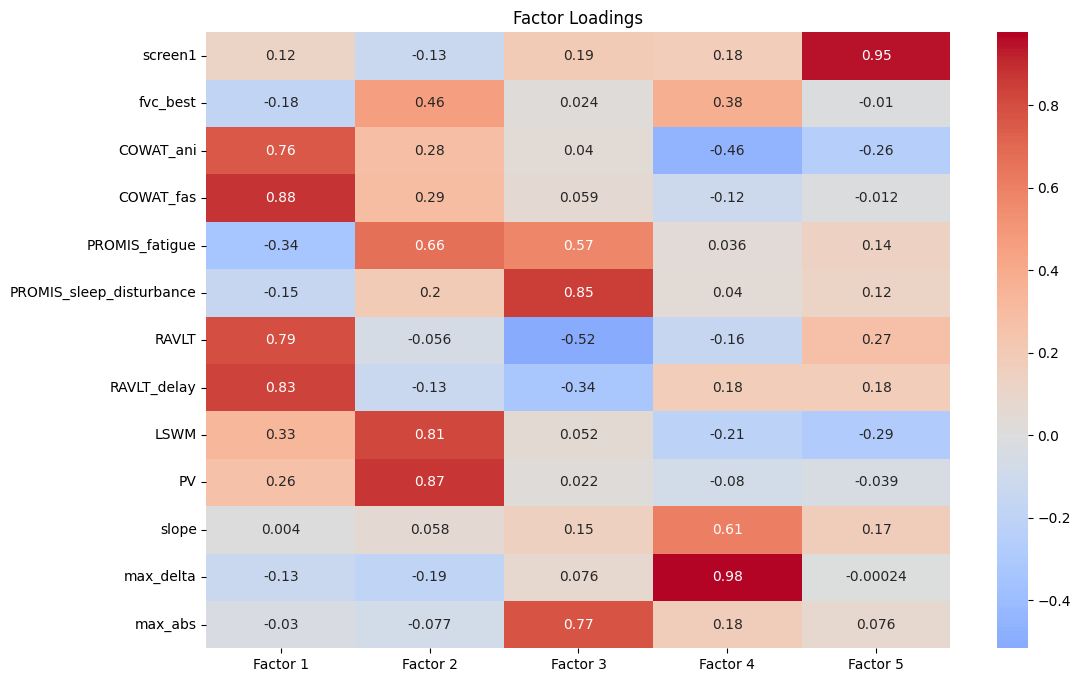

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.show()


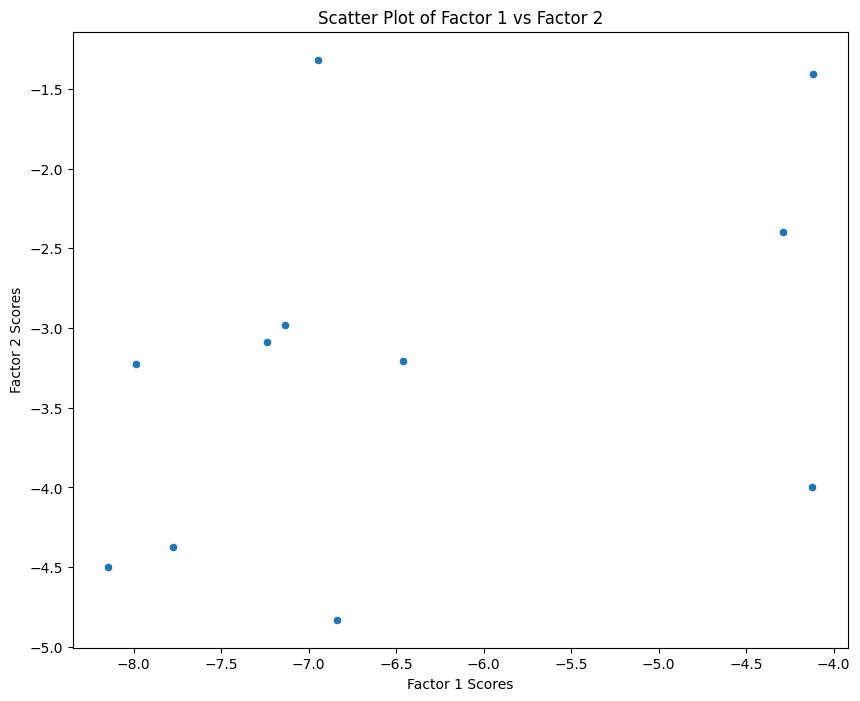

In [77]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Factor_1', y='Factor_2', data=factor_scores_df)
plt.title('Scatter Plot of Factor 1 vs Factor 2')
plt.xlabel('Factor 1 Scores')
plt.ylabel('Factor 2 Scores')
plt.show()

In [78]:

import pandas as pd
import numpy as np
from scipy.stats import rankdata
from scipy.signal import decimate
import math
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def hoeffding(*arg):
  
    if(len(arg)==1):
      if isinstance(arg[0], pd.DataFrame):
        if(arg[0].shape[0]>1):
          return arg[0].apply(lambda x: arg[0].apply(lambda y: hoeffding(x.values, y.values)))
    else:
      if(len(arg)==2):
        if type(arg[0]) is not np.ndarray:
          if (len(arg[0].shape)>1):
            return print("ERROR inputs : hoeffding(df >2col) or hoeffding(numpy.array -1d- ,numpy.array -1d-)")
        if type(arg[1]) is np.ndarray:
          if (len(arg[0].shape)>1):
            return print("ERROR inputs : hoeffding(df >2col) or hoeffding(numpy.array -1d- ,numpy.array -1d-)")
        
        xin=arg[0]
        yin=arg[1]
        #crop data to the smallest array, length have to be equal
        if len(xin)<len(yin):
          yin=yin[:len(xin)]
        if len(xin)>len(yin):
          xin=xin[:len(yin)]

        # dropna
        x = xin[~(np.isnan(xin) | np.isnan(yin))]
        y = yin[~(np.isnan(xin) | np.isnan(yin))]

        # undersampling if length too long
        lenx=len(x)
        if lenx>99999:
            factor=math.ceil(lenx/100000)
            x=x[::factor]
            y=y[::factor]

        # bining if too much "definition"
        if len(np.unique(x))>50:
            est = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='quantile') #faster strategy='quantile' but less accurate
            est.fit(x.reshape(-1, 1))  
            Rtemp = est.transform(x.reshape(-1, 1))
            R=rankdata(Rtemp)
        else:
            R=rankdata(x)
        if len(np.unique(y))>50:
            est1 = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='quantile') #faster strategy='quantile' but less accurate
            est1.fit(y.reshape(-1, 1))  
            Stemp = est1.transform(y.reshape(-1, 1))
            S=rankdata(Stemp)
        else:
            S=rankdata(y)      

        # core processing
        N=x.shape
        dico={(np.nan,np.nan):np.nan}
        dicoRin={np.nan:np.nan}
        dicoSin={np.nan:np.nan}
        dicoRless={np.nan:np.nan}
        dicoSless={np.nan:np.nan}
        Q=np.ones(N[0])

        i=0;
        for r,s in np.nditer([R,S]):
            r=float(r)
            s=float(s)
            if (r,s) in dico.keys():
                Q[i]=dico[(r,s)]
            else:
              if r in dicoRin.keys():
                  isinR=dicoRin[r]
                  lessR=dicoRless[r]
              else:
                  isinR=np.isin(R,r)
                  dicoRin[r]=isinR
                  lessR=np.less(R,r)
                  dicoRless[r]=lessR

              if s in dicoSin.keys():
                  isinS=dicoSin[s]
                  lessS=dicoSless[s]
              else:
                  isinS=np.isin(S,s)
                  dicoSin[s]=isinS
                  lessS=np.less(S,s)
                  dicoSless[s]=lessS


              Q[i] = Q[i] + np.count_nonzero(lessR & lessS) \
                    + 1/4 * (np.count_nonzero(isinR & isinS)-1) \
                    + 1/2 * (np.count_nonzero(isinR & lessS)) \
                     + 1/2 * (np.count_nonzero(lessR & isinS)) 
              dico[(r,s)]=Q[i]
            i+=1

        D1 = np.sum( np.multiply((Q-1),(Q-2)) );
        D2 = np.sum( np.multiply(np.multiply((R-1),(R-2)),np.multiply((S-1),(S-2)) ) );
        D3 = np.sum( np.multiply(np.multiply((R-2),(S-2)),(Q-1)) );

        D = 30*((N[0]-2)*(N[0]-3)*D1 + D2 - 2*(N[0]-2)*D3) / (N[0]*(N[0]-1)*(N[0]-2)*(N[0]-3)*(N[0]-4));


        return D
      return print("ERROR inputs : hoeffding(df >2col) or hoeffding(numpy.array -1d- ,numpy.array -1d-)")

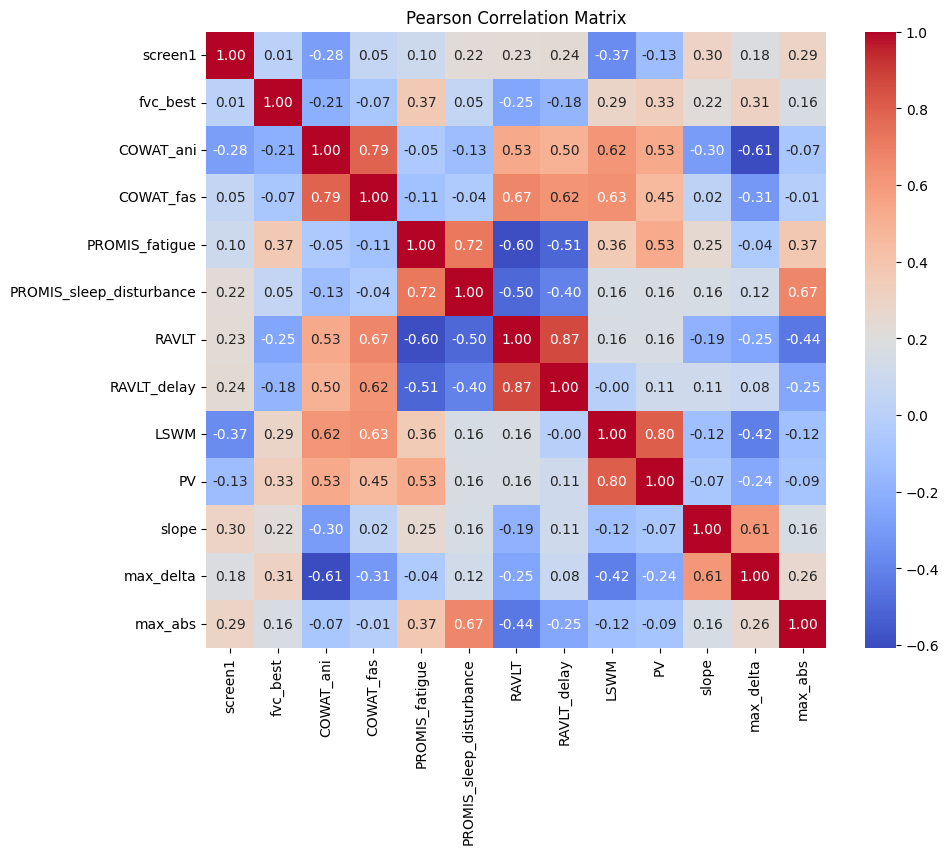

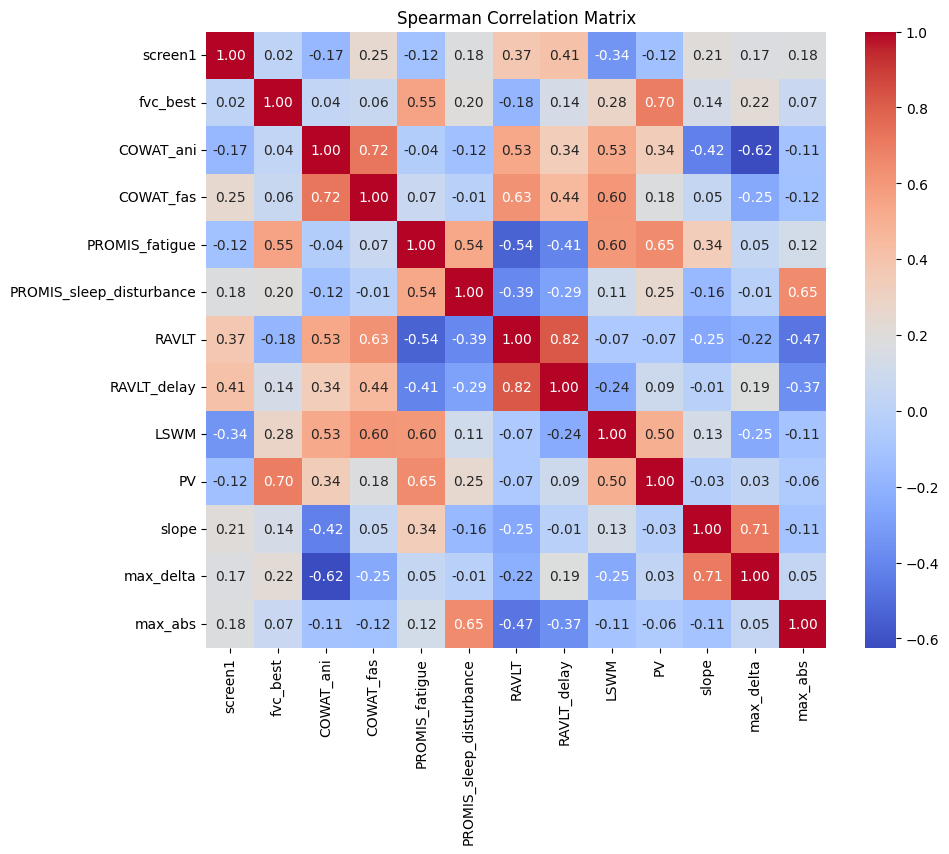

In [79]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns

# Hoeffding's D might require a custom implementation or a package that offers it

# Assuming 'df' is a pandas DataFrame with your data
# Calculate Pearson Correlation Matrix
pearson_corr_matrix = df_selected.corr(method='pearson')

# Calculate Spearman Correlation Matrix
spearman_corr_matrix = df_selected.corr(method='spearman')

# hoeffdings_d_results = {}
# for feature in features.columns.drop('Change_from_Baseline_Fatigue_Rating'):
#     hoeffdings_d_results[feature] = hoeffding(features[['Change_from_Baseline_Fatigue_Rating', feature]])['Change_from_Baseline_Fatigue_Rating'][feature]

# # Convert the dictionary to a DataFrame for easier manipulation and sorting
# hoeffdings_d_df = pd.DataFrame.from_dict(hoeffdings_d_results, orient='index', columns=['Hoeffdings_D'])
# hoeffdings_d_df.sort_values('Hoeffdings_D', ascending=False, inplace=True)
# # For Hoeffding's D, a loop is needed since there's no built-in pairwise function
# # Please note this can take a long time for large dataframes
# def hoeffdings_d_matrix(df):
#     columns = df.columns
#     hoeffding_d_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)
#     # Loop through columns
#     for col1 in columns:
#         for col2 in columns:
#             if col1 != col2:
#                 x = df[col1].values
#                 y = df[col2].values
#                 d = hoeffding(x, y)  # This would be a custom function or from a specific package
#                 hoeffding_d_matrix.at[col1, col2] = d
#     return hoeffding_d_matrix

# Replace this with the appropriate calculation or package import
# hoeffding_d_matrix = hoeffdings_d_matrix(df)

# Now you have three correlation matrices: Pearson, Spearman, and Hoeffding's D


# Assuming you have already computed the Pearson and Spearman correlation matrices and stored them as 'pearson_corr_matrix' and 'spearman_corr_matrix'

# Visualize the Pearson Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Visualize the Spearman Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()



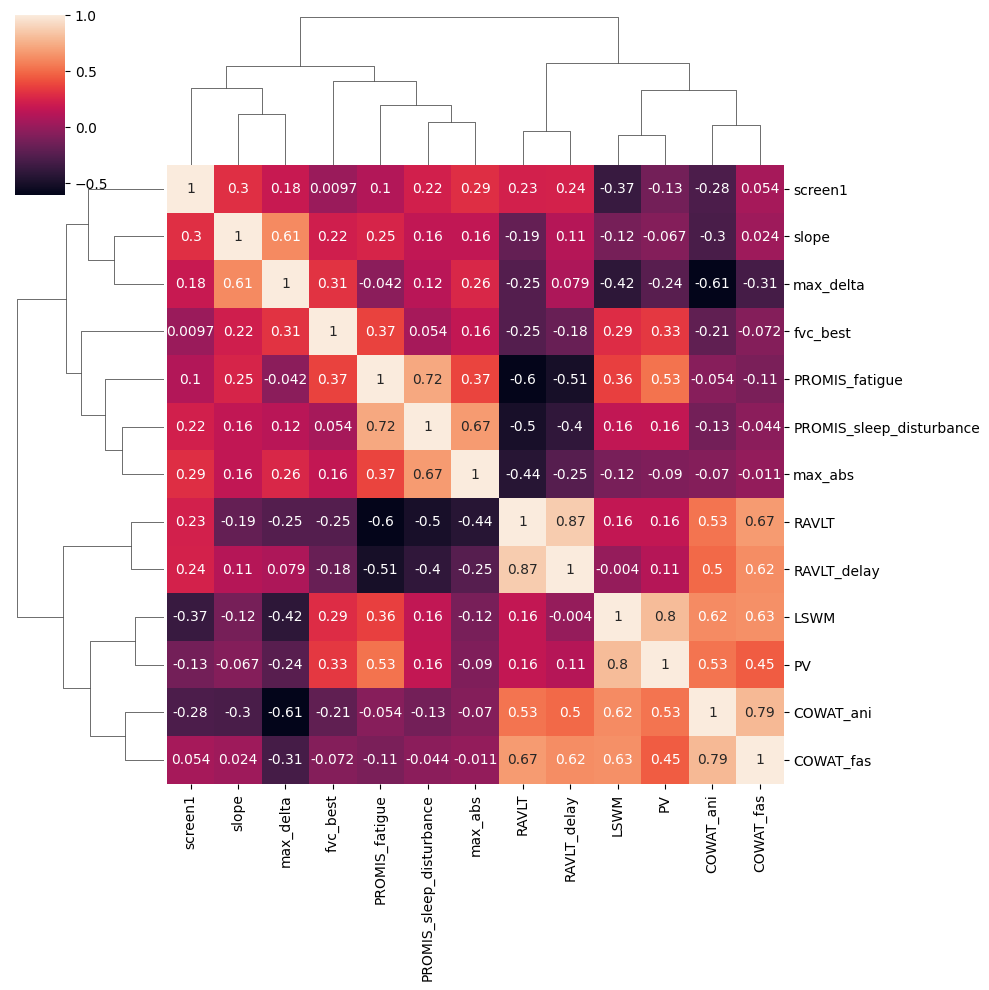

ValueError: array must not contain infs or NaNs

In [80]:
# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_selected.corr()
sns.clustermap(correlation_matrix, annot=True)
plt.show()

# Calculate the p-value matrix to find significant correlations
from scipy.stats import pearsonr


pval_matrix = correlation_matrix.copy()
for i in range(len(pval_matrix.columns)):
    for j in range(len(pval_matrix.columns)):
        _, pval = pearsonr(og_data[correlation_matrix.columns[i]], og_data[correlation_matrix.columns[j]])
        pval_matrix.iloc[i, j] = pval

# Customize the figure size
plt.figure(figsize=(10, 8))
# Mask for insignificant correlations
mask_non_significant = np.where(pval_matrix > 0.05, True, False)

# Heatmap with significance mask
ax=sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the axis font size
ax.tick_params(axis='both', which='major', labelsize=10)  # Set axis label size
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 6)  # Set X axis font size
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 6)  # Set Y axis font size

plt.show()

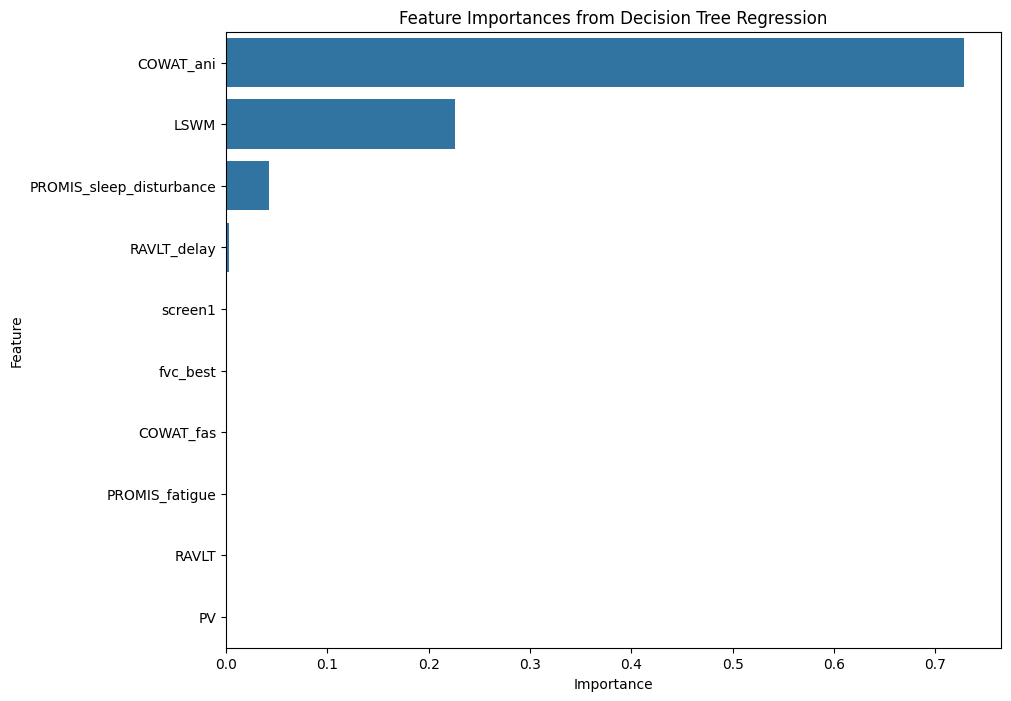

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = df_selected.drop('max_delta', axis=1)  # Features
X = X.drop('max_abs', axis=1)  # Features
X = X.drop('slope', axis=1)  # Features
y = df_selected['slope']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = regressor.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Decision Tree Regression')
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming 'og_data' is your DataFrame with participant data
# # 'copy' should be a deep copy of 'og_data' if you want to preserve the original data
# copy = og_data.copy()

# # Calculate the slope of 'Fatigue_Rating' across blocks for each subject
# # Also calculate the biggest change from baseline
# fatigue_slopes = {}
# biggest_fatigue_change_from_baseline = {}

# for candidate in og_data['SubjID'].unique():
#     candidate_data = og_data[og_data['SubjID'] == candidate]
#     candidate_data = candidate_data.sort_values(by='Block')
    
#     # Calculate the baseline 'Fatigue_Rating'
#     baseline_fatigue = candidate_data[candidate_data['Block'] == 0]['Fatigue_Rating'].values[0]
    
#     # Calculate changes from baseline
#     candidate_data['Change_from_Baseline_Fatigue_Rating'] = candidate_data['Fatigue_Rating'] - baseline_fatigue
    
#     # Calculate the slope using a simple linear regression (np.polyfit) across the blocks
#     blocks = candidate_data['Block'].values
#     fatigue_ratings = candidate_data['Fatigue_Rating'].values
#     slope, intercept = np.polyfit(blocks, fatigue_ratings, 1)
#     fatigue_slopes[candidate] = slope
    
#     # Find the biggest change from baseline
#     biggest_change = candidate_data['Change_from_Baseline_Fatigue_Rating'].abs().max()
#     biggest_fatigue_change_from_baseline[candidate] = biggest_change
    
# # Add the slope and biggest change to the 'copy' DataFrame
# for candidate in og_data['SubjID'].unique():
#     copy.loc[copy['SubjID'] == candidate, 'Fatigue_Slope'] = fatigue_slopes[candidate]
#     copy.loc[copy['SubjID'] == candidate, 'Biggest_Fatigue_Change_from_Baseline'] = biggest_fatigue_change_from_baseline[candidate]

# # Now 'copy' contains two new columns: 'Fatigue_Slope' and 'Biggest_Fatigue_Change_from_Baseline'
# # for each participant, with the slope of their 'Fatigue_Rating' over the blocks and their
# # biggest change in 'Fatigue_Rating' from the baseline.

